In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/MBTC_USD_H8_100621_processed.csv')

In [3]:
df['time'] = pd.to_datetime(df['time'])

In [4]:
df.set_index('time', inplace=True)

In [5]:
df

,open,high,low,close,volume,weekday,hour,weekofyear,quarter,weekofquarter,mid,xau_ratio,eur,eur_ratio
time,,,,,,,,,,,,,,
2016-05-17 05:00:00+00:00,4.541,4.548,4.526,4.537,11720,1,5,20,2,7,4.541,1.024449,1.13154,1.063290
2016-05-17 13:00:00+00:00,4.537,4.554,4.534,4.546,11743,1,13,20,2,7,4.551,1.030494,1.13110,1.065762
2016-05-17 21:00:00+00:00,4.546,4.552,4.545,4.552,10047,1,21,20,2,7,4.549,1.026908,1.13132,1.066954
2016-05-18 05:00:00+00:00,4.552,4.557,4.551,4.555,6734,2,5,20,2,7,4.552,1.029603,1.12858,1.070225
2016-05-18 13:00:00+00:00,4.555,4.562,4.550,4.560,11225,2,13,20,2,7,4.558,1.033544,1.12744,1.072465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-09 05:00:00+00:00,329.933,350.735,329.315,349.172,404972,2,5,23,2,10,340.822,0.636082,1.21796,0.795586
2021-06-09 13:00:00+00:00,349.167,369.792,346.150,364.150,410266,2,13,23,2,10,365.188,0.664941,1.21946,0.827888
2021-06-09 21:00:00+00:00,364.001,376.957,362.312,368.130,300474,2,21,23,2,10,369.825,0.675540,1.21794,0.837148


In [23]:
df[['open', 'close']].max(axis=1)

time
2016-05-17 05:00:00+00:00      4.541
2016-05-17 13:00:00+00:00      4.546
2016-05-17 21:00:00+00:00      4.552
2016-05-18 05:00:00+00:00      4.555
2016-05-18 13:00:00+00:00      4.560
                              ...   
2021-06-09 05:00:00+00:00    349.172
2021-06-09 13:00:00+00:00    364.150
2021-06-09 21:00:00+00:00    368.130
2021-06-10 05:00:00+00:00    377.956
2021-06-10 13:00:00+00:00    377.951
Length: 4511, dtype: float64

In [6]:
def diffVector(d, window=20):
    w = 1
    vector = list()
    vector.append(w)
    
    for k in range(1, window):
        w = -w *( (d - k + 1) / k)
        vector.append(w)
    
    return np.array(vector)

In [18]:
dvector = diffVector(0.8)

In [8]:
dvector

array([ 1.00000000e+00, -8.00000000e-01, -8.00000000e-02, -3.20000000e-02,
       -1.76000000e-02, -1.12640000e-02, -7.88480000e-03, -5.85728000e-03,
       -4.53939200e-03, -3.63151360e-03, -2.97784115e-03, -2.49055805e-03,
       -2.11697435e-03, -1.82385482e-03, -1.58935920e-03, -1.39863610e-03,
       -1.24128954e-03, -1.10985888e-03, -9.98872992e-04, -9.04242919e-04])

In [9]:
def dot(a):
    return np.dot(a, dvector)

<AxesSubplot:xlabel='time'>

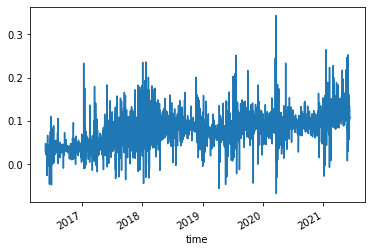

In [20]:
np.log(df.close).rolling(20).apply(dot).plot()

<AxesSubplot:xlabel='time'>

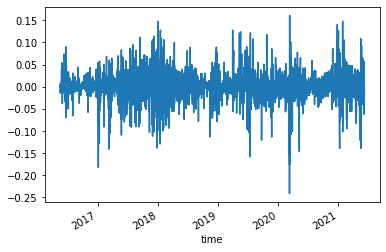

In [11]:
np.log(df.close).diff().plot()

In [12]:
from statsmodels.tsa.stattools import adfuller

In [19]:
adfuller(np.log(df.close).rolling(20).apply(dot).dropna().values)

(-3.2274097380339537,
 0.018451916429691767,
 32,
 4459,
 {'1%': -3.431817384731168,
  '5%': -2.8621884080632585,
  '10%': -2.567115151370683},
 -19709.780625050444)

In [14]:
adfuller(np.log(df.close).diff().dropna().values)

(-29.628029649108,
 0.0,
 4,
 4505,
 {'1%': -3.4318023928959036,
  '5%': -2.8621817850871287,
  '10%': -2.5671116256447086},
 -19858.343071605705)